In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [66]:
pi_results = pd.read_csv('pi_results_full.csv')
pi_results

,size,n_threads,pi,time
0,1000000000,1,3.141596,1313.770334
1,1000000000,2,3.141660,672.136762
2,1000000000,3,3.141559,481.478558
3,1000000000,4,3.141651,373.011090
4,1000000000,5,3.141605,301.038328
...,...,...,...,...
458,100000000,9,3.141755,34.622055
459,100000000,10,3.141761,31.407061
460,100000000,11,3.141567,28.296302
461,100000000,12,3.141462,13.590545


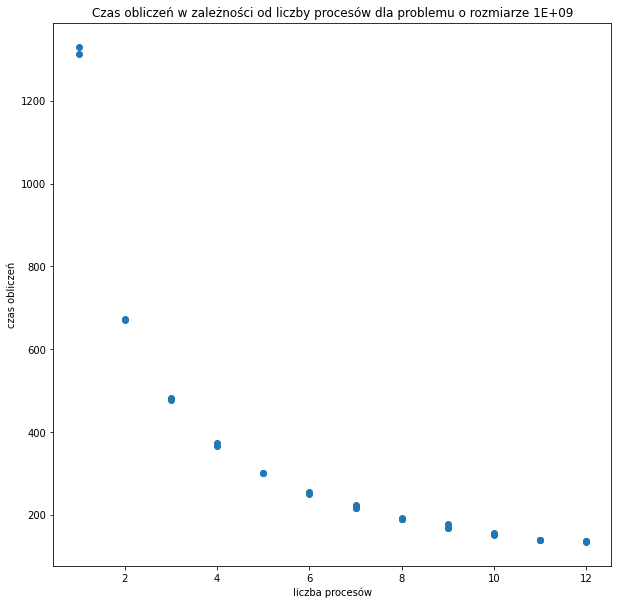

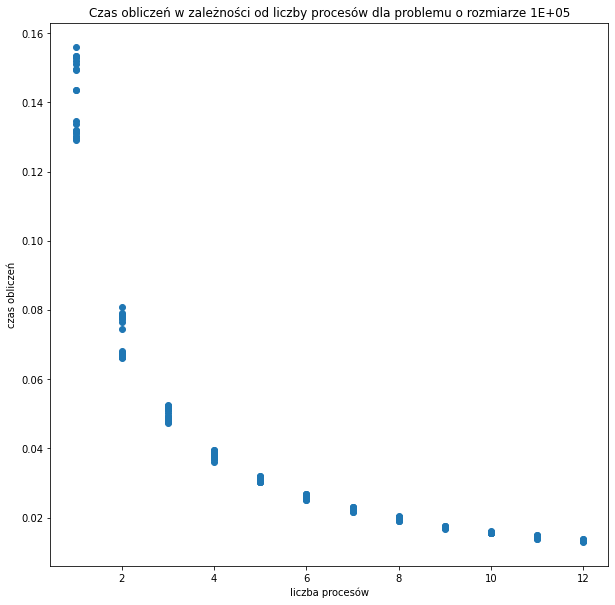

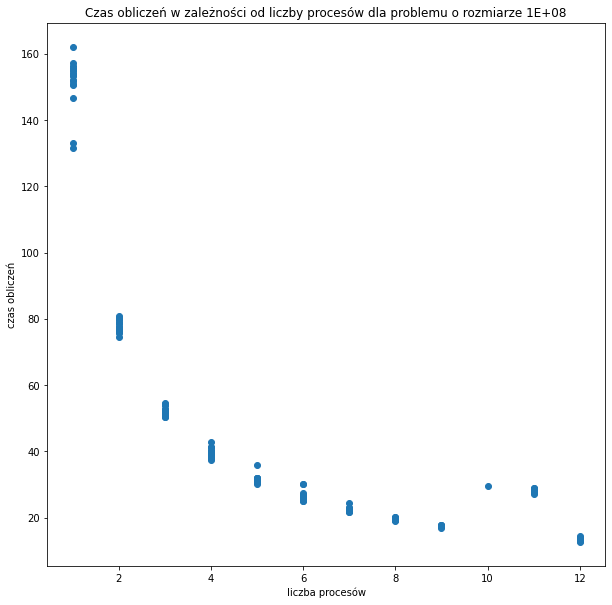

In [67]:
sizes = pi_results['size'].unique()
n_threads = pi_results['n_threads'].unique()
pi_filtered = pd.DataFrame(columns=pi_results.columns)

for size in sizes:
    size_results = pi_results[ pi_results['size'] == size]
    for n_thread in n_threads:
        size_thread = size_results[ size_results['n_threads'] == n_thread]
        f = 0.25 if size != 1e8 else 0.3
        if n_thread > 7:
            size_thread = size_thread[ size_thread['time'] < f * size / 1e6 ]
        pi_filtered = pd.concat([pi_filtered, size_thread])

pi_results = pi_filtered

pi_means = pd.DataFrame(columns=['size', 'n_threads','mean','std'])

i = 0

for size in sizes:
    size_str = '%.0E' % size

    size_results = pi_filtered[ pi_filtered['size'] == size]
    plt.figure(figsize=(10,10))

    plt.scatter(size_results['n_threads'],size_results['time'])

    plt.title(f'Czas obliczeń w zależności od liczby procesów dla problemu o rozmiarze {size_str}')
    plt.xlabel('liczba procesów')
    plt.ylabel('czas obliczeń')
    plt.savefig(f'time_to_threads_{size_str}.png')
    for n_thread in n_threads:
        size_thread = size_results[ size_results['n_threads'] == n_thread]
        pi_means.loc[i] = [size, n_thread, size_thread['time'].mean(),size_thread['time'].std()]
        i += 1



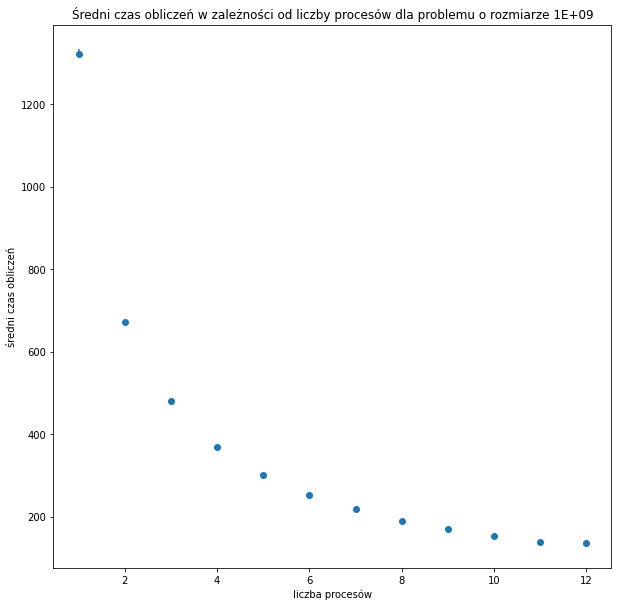

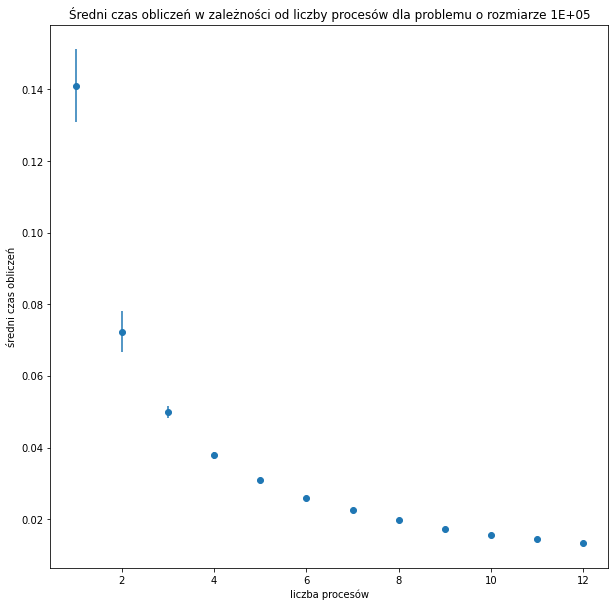

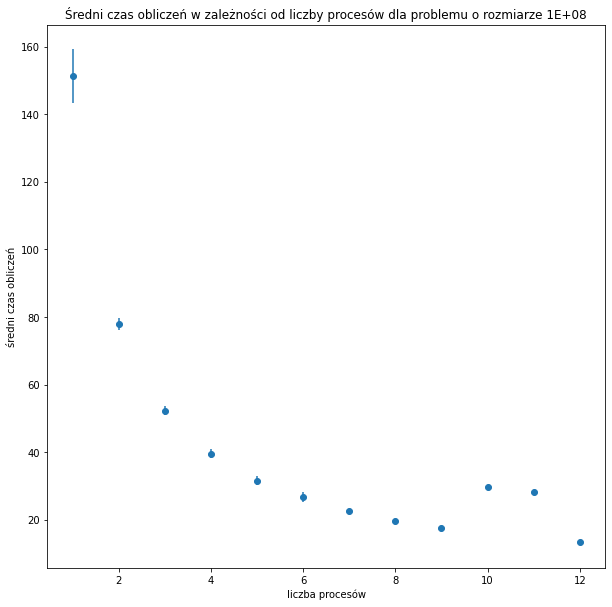

In [68]:

for size in sizes:
    size_str = '%.0E' % size

    plt.figure(figsize=(10,10))

    size_means = pi_means[ pi_means['size'] == size]
    plt.errorbar(size_means['n_threads'],size_means['mean'], yerr=size_means['std'], fmt='o')

    plt.title(f'Średni czas obliczeń w zależności od liczby procesów dla problemu o rozmiarze {size_str}')
    plt.xlabel('liczba procesów')
    plt.ylabel('średni czas obliczeń')
    plt.savefig(f'mean_time_to_threads_{size_str}.png')

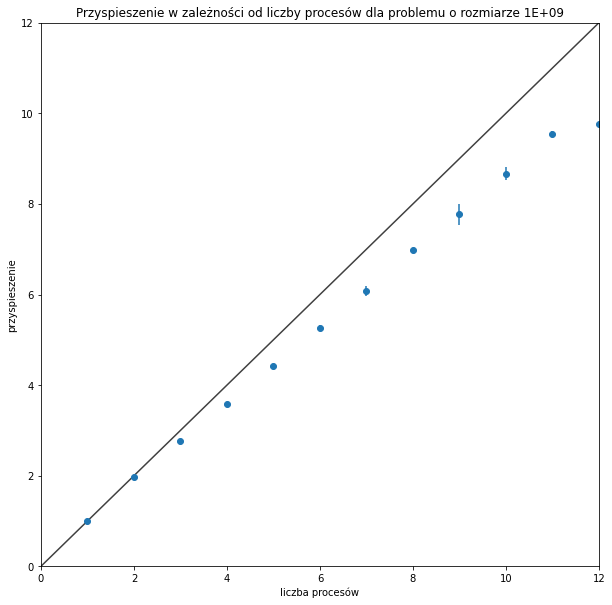

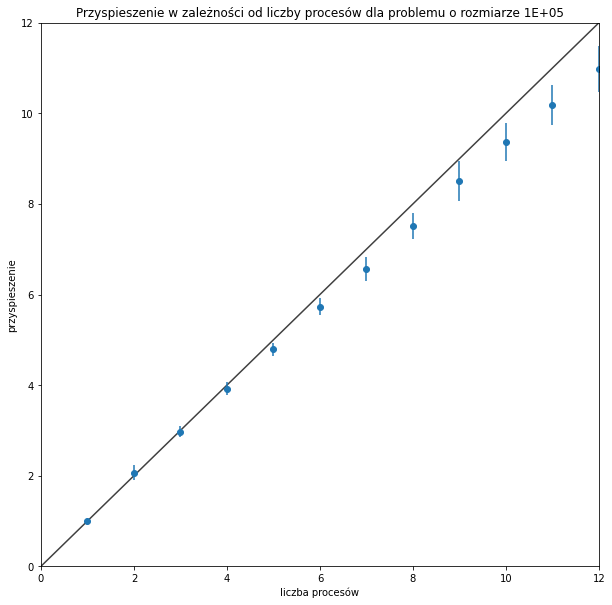

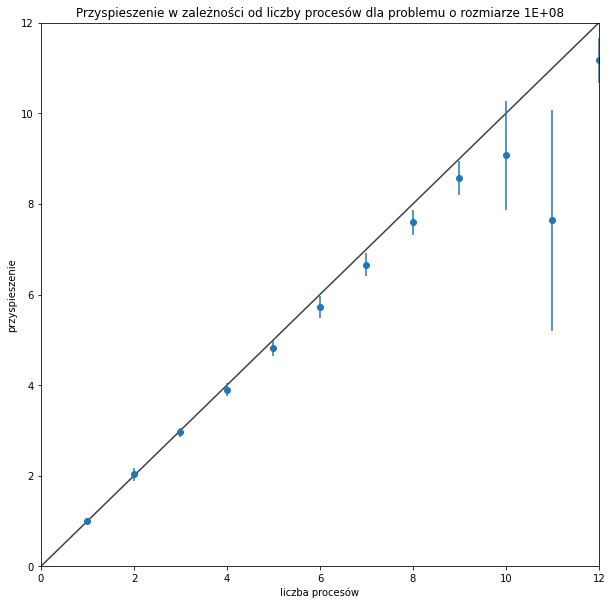

In [75]:
pi_speedup = pd.DataFrame(columns=['size', 'n_threads','speedup'])
pi_speedup_means = pd.DataFrame(columns=['size', 'n_threads','mean','std'])

i = 0
for size in sizes:
    size_results = pi_results[ pi_results['size'] == size ]
         
    
    time_1thread = 0
    for j, row in size_results.iterrows():
        n_thread = row['n_threads']
        if n_thread == 1:
            time_1thread = row['time']
    

        pi_speedup.loc[j] = [size, n_thread, time_1thread / row['time']]
    
    for n_thread in n_threads:
        size_thread_speedup = pi_speedup[ pi_speedup['n_threads'] == n_thread]
        pi_speedup_means.loc[i] = [size, n_thread, size_thread_speedup['speedup'].mean(),size_thread_speedup['speedup'].std()]
        i += 1
    
for size in sizes:
    size_str = '%.0E' % size

    plt.figure(figsize=(10,10))

    size_means = pi_speedup_means[ pi_speedup_means['size'] == size]
    plt.errorbar(size_means['n_threads'],size_means['mean'], yerr=size_means['std'], fmt='o')

    plt.title(f'Przyspieszenie w zależności od liczby procesów dla problemu o rozmiarze {size_str}')
    plt.xlabel('liczba procesów')
    plt.ylabel('przyspieszenie')
    plt.xlim([0,12])
    plt.ylim([0,12])
    lims = [ 0,12 ]
    plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.savefig(f'speedup_to_threads_{size_str}.png')

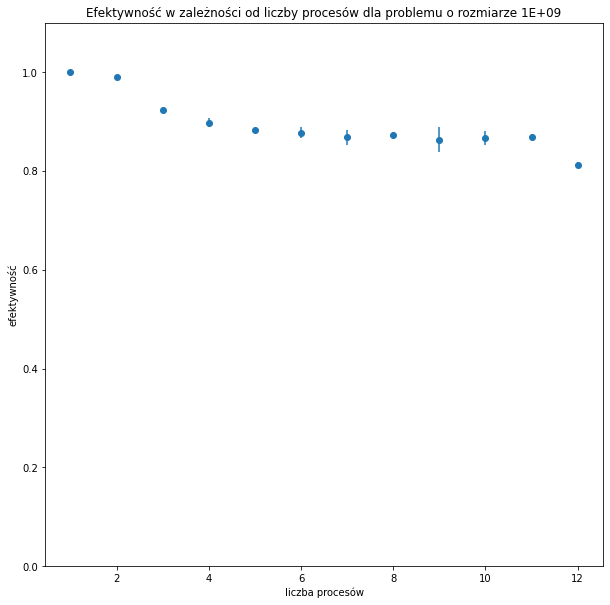

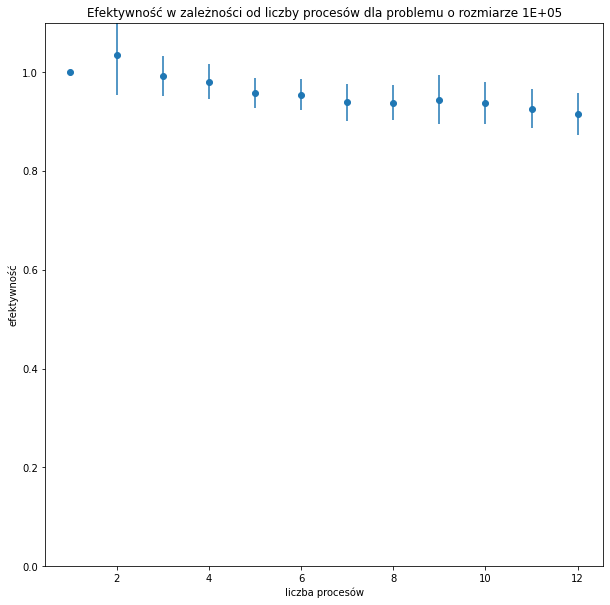

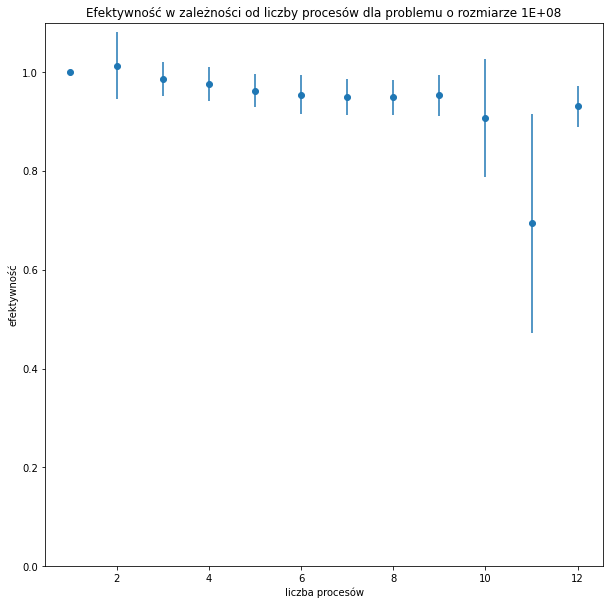

In [71]:
efficiency = 'efficiency'
pi_efficiency = pd.DataFrame(columns=['size', 'n_threads',efficiency])
pi_efficiency_means = pd.DataFrame(columns=['size', 'n_threads','mean','std'])

i = 0
for size in sizes:
    size_results = pi_speedup[ pi_speedup['size'] == size]
    for j, row in size_results.iterrows():
        n_thread = row['n_threads']
        pi_efficiency.loc[j] = [size, n_thread, row['speedup']/n_thread]
    
    for n_thread in n_threads:
        size_thread = pi_efficiency[ pi_efficiency['n_threads'] == n_thread]
        pi_efficiency_means.loc[i] = [size, n_thread, size_thread[efficiency].mean(), size_thread[efficiency].std()]
        i += 1
    
for size in sizes:
    size_str = '%.0E' % size

    plt.figure(figsize=(10,10))

    size_means = pi_efficiency_means[ pi_efficiency_means['size'] == size]
    plt.errorbar(size_means['n_threads'],size_means['mean'], yerr=size_means['std'], fmt='o')

    plt.title(f'Efektywność w zależności od liczby procesów dla problemu o rozmiarze {size_str}')
    plt.xlabel('liczba procesów')
    plt.ylabel('efektywność')
    plt.ylim([0,1.1])
    plt.savefig(f'efficiency_to_threads_{size_str}.png')

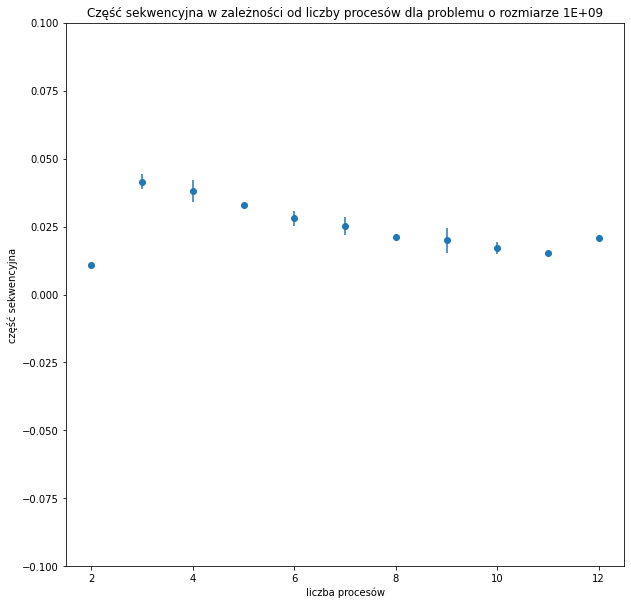

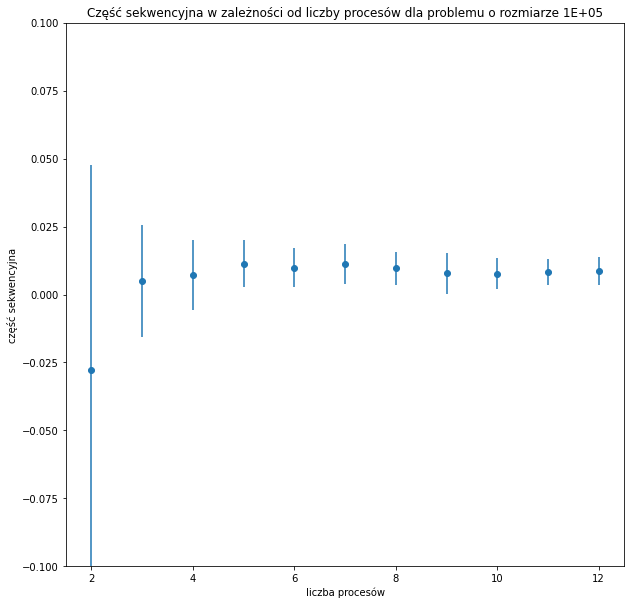

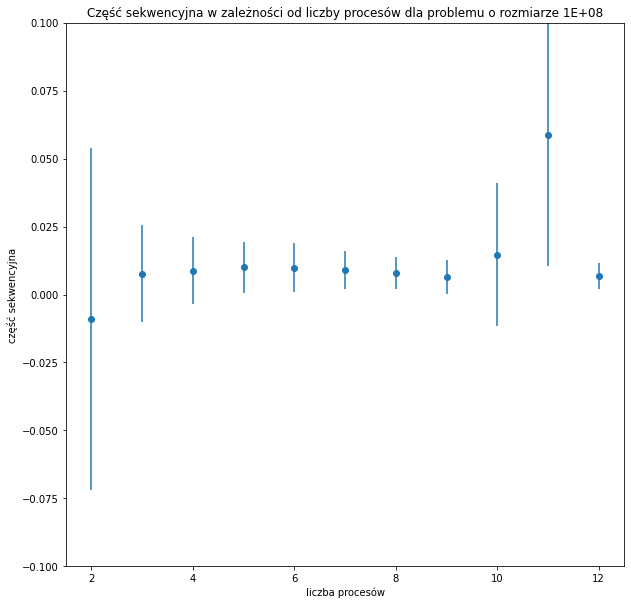

In [74]:

pi_sf = pd.DataFrame(columns=['size', 'n_threads', 'sf'])
pi_sf_means = pd.DataFrame(columns=['size', 'n_threads','mean','std'])

i = 0
for size in sizes:
    size_results = pi_speedup[ pi_speedup['size'] == size]
    for j, row in size_results.iterrows():
        n_thread = row['n_threads']
        if n_thread != 1:
            pi_sf.loc[j] = [size, n_thread, (1/row['speedup'] - 1/n_thread)/(1 - 1/n_thread)]
    
    for n_thread in n_threads:
        size_thread = pi_sf[ pi_sf['n_threads'] == n_thread]
        pi_sf_means.loc[i] = [size, n_thread, size_thread['sf'].mean(), size_thread['sf'].std()]
        i += 1
    
for size in sizes:
    size_str = '%.0E' % size

    plt.figure(figsize=(10,10))

    size_means = pi_sf_means[ pi_sf_means['size'] == size]
    plt.errorbar(size_means['n_threads'],size_means['mean'], yerr=size_means['std'], fmt='o')

    plt.title(f'Część sekwencyjna w zależności od liczby procesów dla problemu o rozmiarze {size_str}')
    plt.xlabel('liczba procesów')
    plt.ylabel('część sekwencyjna')
    plt.ylim([-0.1,.10])
    plt.savefig(f'sf_to_threads_{size_str}.png')

In [37]:
s_r_results_1node = pd.read_csv('send_recv_time_1node.csv')
s_r_results_1node['nodes'] = 1
s_r_results_2nodes = pd.read_csv('send_recv_time_2nodes.csv')
s_r_results_2nodes['nodes'] = 2
s_r_results = pd.concat([s_r_results_1node, s_r_results_2nodes])
s_r_results

,size,time,Mbps,type,nodes
0,1,0.000001,5.129438,ibsend,1
1,1,0.000001,9.856769,ssend,1
2,2,0.000001,10.269576,ibsend,1
3,2,0.000001,25.671881,ssend,1
4,3,0.000001,15.806372,ibsend,1
...,...,...,...,...,...
3995,1998,0.000072,212.748046,ssend,2
3996,1999,0.000061,248.247331,ibsend,2
3997,1999,0.000072,212.819826,ssend,2
3998,2000,0.000062,247.719721,ibsend,2


In [79]:
small = s_r_results[ s_r_results['size'] == 1]
small['time'] = small['time'] * 1000
small

/tmp/ipykernel_828769/593147829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['time'] = small['time'] * 1000


,size,time,Mbps,type,nodes
0,1,0.001,5.129438,ibsend,1
1,1,0.001,9.856769,ssend,1
0,1,0.037,0.208968,ibsend,2
1,1,0.068,0.112022,ssend,2


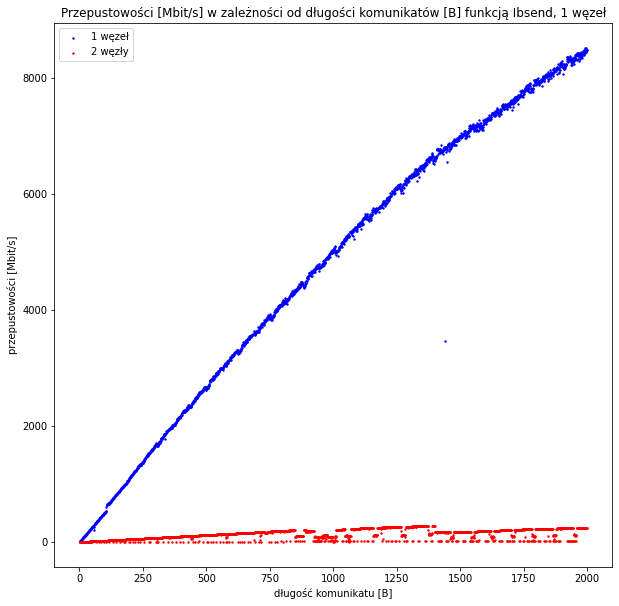

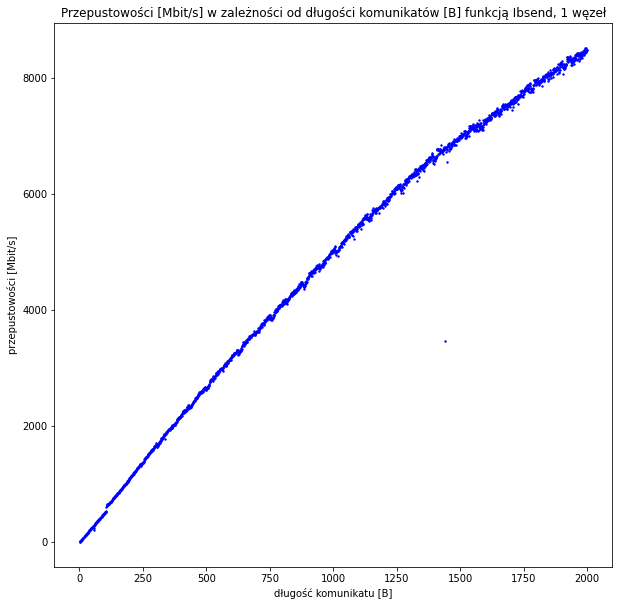

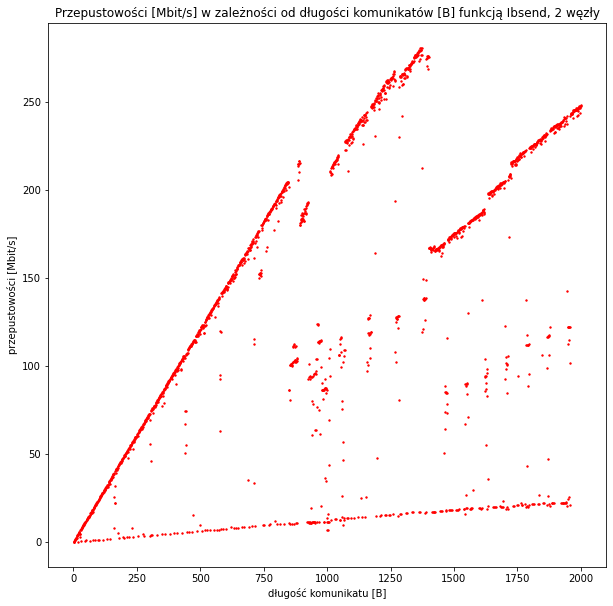

In [76]:
fig, ax = plt.subplots(figsize=(10,10))

ibsend_values_1 = s_r_results_1node[ s_r_results_1node['type'] == 'ibsend']
ax.scatter(ibsend_values_1['size'],ibsend_values_1['Mbps'],s=(100./fig.dpi)**2, c='blue', label='1 węzeł')

ibsend_values_2 = s_r_results_2nodes[ s_r_results_2nodes['type'] == 'ibsend']
ax.scatter(ibsend_values_2['size'],ibsend_values_2['Mbps'],s=(100./fig.dpi)**2, c='red', label='2 węzły')
ax.legend()

plt.title(f'Przepustowości [Mbit/s] w zależności od długości komunikatów [B] funkcją Ibsend, 1 węzeł')
plt.xlabel('długość komunikatu [B]')
plt.ylabel('przepustowości [Mbit/s]')
plt.savefig(f'throughput_to_len_ibsend.png')

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(ibsend_values_1['size'],ibsend_values_1['Mbps'],s=(100./fig.dpi)**2, c='blue', label='1 węzeł')

plt.title(f'Przepustowości [Mbit/s] w zależności od długości komunikatów [B] funkcją Ibsend, 1 węzeł')
plt.xlabel('długość komunikatu [B]')
plt.ylabel('przepustowości [Mbit/s]')
plt.savefig(f'throughput_to_len_ibsend_1node.png')

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(ibsend_values_2['size'],ibsend_values_2['Mbps'],s=(100./fig.dpi)**2, c='red', label='2 węzły')

plt.title(f'Przepustowości [Mbit/s] w zależności od długości komunikatów [B] funkcją Ibsend, 2 węzły')
plt.xlabel('długość komunikatu [B]')
plt.ylabel('przepustowości [Mbit/s]')
plt.savefig(f'throughput_to_len_ibsend_2nodes.png')

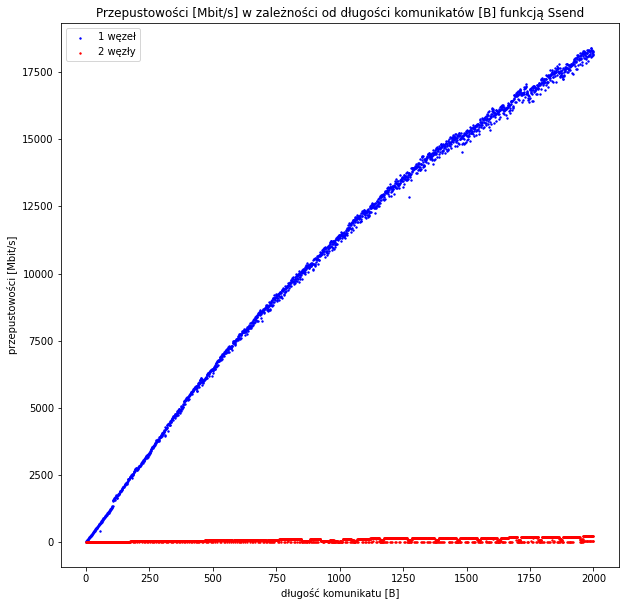

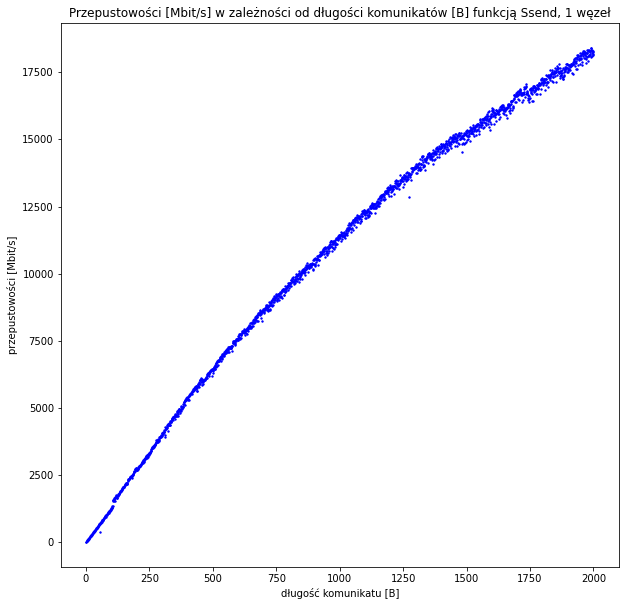

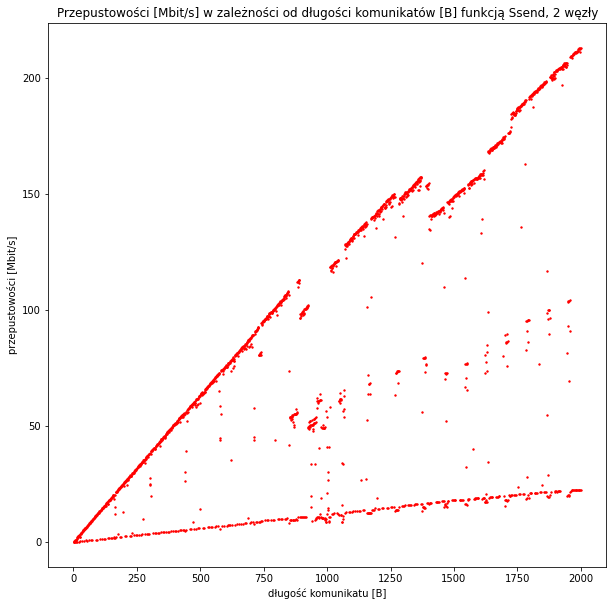

In [77]:
fig, ax = plt.subplots(figsize=(10,10))

ibsend_values_1 = s_r_results_1node[ s_r_results_1node['type'] == 'ssend']
ax.scatter(ibsend_values_1['size'],ibsend_values_1['Mbps'],s=(100./fig.dpi)**2, c='blue', label='1 węzeł')

ibsend_values_2 = s_r_results_2nodes[ s_r_results_2nodes['type'] == 'ssend']
ax.scatter(ibsend_values_2['size'],ibsend_values_2['Mbps'],s=(100./fig.dpi)**2, c='red', label='2 węzły')
ax.legend()

plt.title(f'Przepustowości [Mbit/s] w zależności od długości komunikatów [B] funkcją Ssend')
plt.xlabel('długość komunikatu [B]')
plt.ylabel('przepustowości [Mbit/s]')
plt.savefig(f'throughput_to_len_ssend.png')

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(ibsend_values_1['size'],ibsend_values_1['Mbps'],s=(100./fig.dpi)**2, c='blue', label='1 węzeł')

plt.title(f'Przepustowości [Mbit/s] w zależności od długości komunikatów [B] funkcją Ssend, 1 węzeł')
plt.xlabel('długość komunikatu [B]')
plt.ylabel('przepustowości [Mbit/s]')
plt.savefig(f'throughput_to_len_ssend_1node.png')

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(ibsend_values_2['size'],ibsend_values_2['Mbps'],s=(100./fig.dpi)**2, c='red', label='2 węzły')

plt.title(f'Przepustowości [Mbit/s] w zależności od długości komunikatów [B] funkcją Ssend, 2 węzły')
plt.xlabel('długość komunikatu [B]')
plt.ylabel('przepustowości [Mbit/s]')
plt.savefig(f'throughput_to_len_ssend_2nodes.png')